In [79]:
#Import Libraries
import pandas as pd
import numpy as np #use to deal with arrays
import matplotlib.pyplot as plt#visualization
import seaborn as sns#visualization and some statistical concepts
%matplotlib inline   

In [80]:
#Reading data file into pandas dataframe

titanic=pd.read_csv('train.csv')

In [81]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
#Let's begin EDA.We'll start by seeing missing data.
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

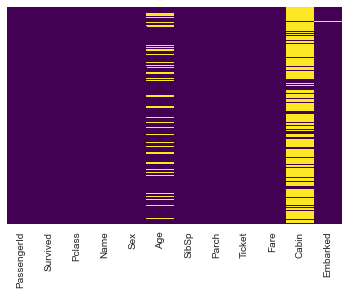

In [83]:
#we can use seaborn to create a simple heatmap to see where we are missing data.
#using cmap viridis all null values are shown in yellow color
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Roughly 20% of the Age data is missing.Looking at the cabin column it looks like too much data is missing.Let's visualize some other data.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

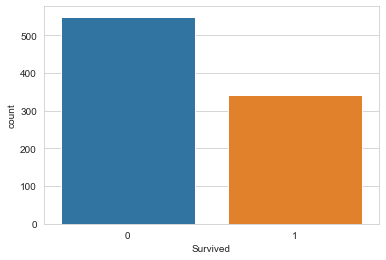

In [84]:
sns.set_style('whitegrid')#see whitegrid
sns.countplot(x='Survived',data=titanic)#counterplot using survived column we get count about people
#0 means person did not survive 1 means survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

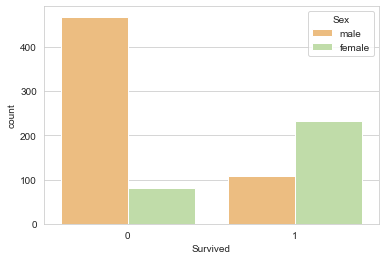

In [85]:
#another counterplot to see survival based on Male and Female
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='Spectral')#palette is used for colorful visualization 
#hue is survived column will be divided based on sex column

**Survival rate of men is less as compared to women.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

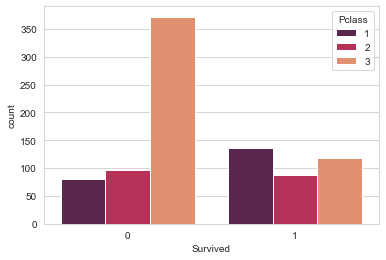

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rocket')
#checking survived based on passenger class
#1-richerclass and so on.

**PC1 People died Less and PC3 People died most.
PC1 People survived most then PC3 and at last PC2.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

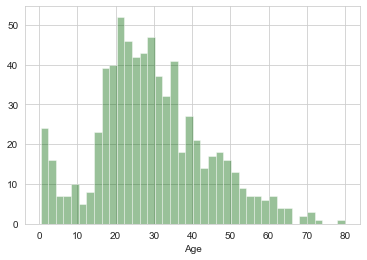

In [87]:
#Using age will try to find out the average age of the people at titanic
#Dropping Nan values
#histogram when kde is false.It tells us frequency of count of people within specific age range
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkgreen',bins=40)

**Maximum number of people were among range 17-30**

<AxesSubplot:>

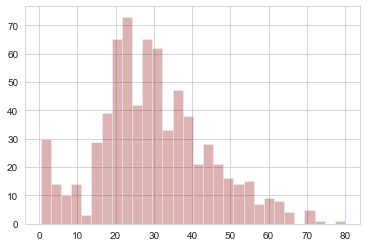

In [88]:
#another way
titanic['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

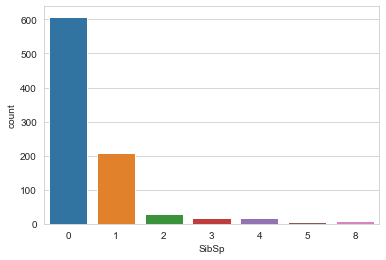

In [89]:
#Countplot of siblings and spouse
#Gives frequency o count of people
#0-donot have any siblings or spouse
#1-have one sibling or spouse and so on.
sns.countplot(x='SibSp',data=titanic)

**We can see that maximum people donot have any sibling or spouse.**

<AxesSubplot:>

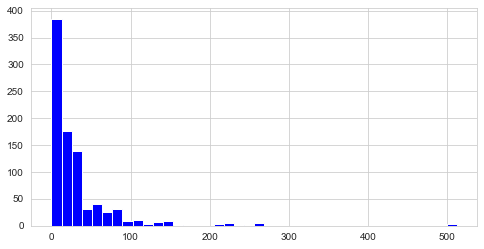

In [90]:
#Fare of the tickets.
titanic['Fare'].hist(color='blue',bins=40,figsize=(8,4))

**Data Cleaning:We will fill in missing age data instead of dropping it.We will fill mean age of passenger in null values of age.**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

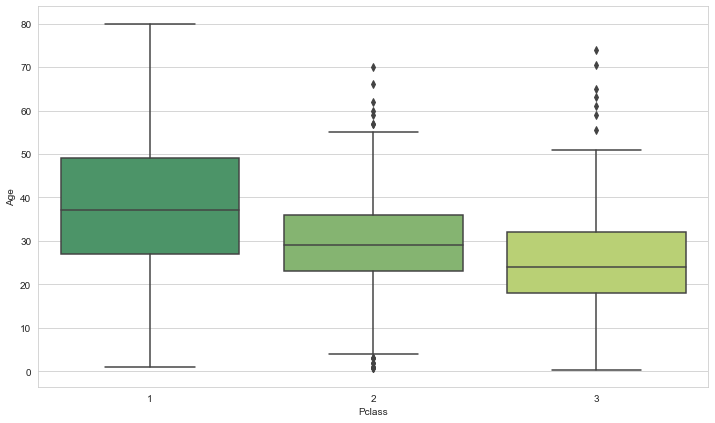

In [91]:
#Relationship b/w passenger class and age
#the horizontal line shows average value of age 37,29,24
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='summer')

In [92]:
#creating a func
#Based on these avg. ages we will replace our Nan values of Age
#cols=age and PC Column
#1st will be age and 2nd will be PC
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):  #if age column is null
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [93]:
##Now calling func by using .apply
#for each record of age and passenger class this impute age will apply when we call this func.

titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

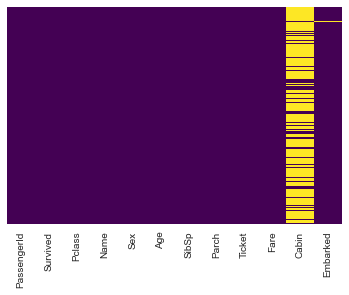

In [94]:
#Now let's check heatmap again
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [95]:
#Now we will drop cabin column as it has many null values.If we want to replace these much null values we have to use lot of Feature Engineering that is totally different concept.
titanic.drop('Cabin',axis=1,inplace=True)

In [96]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Now we can see there is no Cabin column in our dataset.**

<AxesSubplot:>

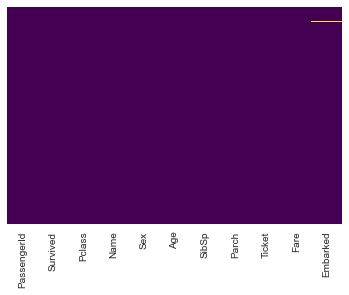

In [97]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
titanic.dropna(inplace=True)

**Converting Categorical features to Dummy variables using pandas.Otherwise our ML Algorithm won't be able to directly take in those features as inputs.**

In [99]:
#Now we can see we can get dummies using get_dummies func. of pandas for Sex And Embarked as they are further categorized.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [100]:
pd.get_dummies(titanic['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [102]:
#creating two more columns for coverting categorical features into dummy variables
sex=pd.get_dummies(titanic['Sex'],drop_first=True) #drop first=true means dropping first column
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [103]:
#Now we will drop unnecessary columns
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [104]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [105]:
titanic=pd.concat([titanic,sex,embark],axis=1)

In [106]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [107]:
#Now our data is ready.Building a logistic Regression Model
#Dividing in dependent and independent features
#Survived is dependent and rest all are independent features

#Now let's split our data into a training set and test set


In [108]:
#Titanic Test Split
titanic.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [109]:
titanic['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],test_size=0.30,random_state=101)

**Training and Predicting**

In [113]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression() #applying logistic regression
logmodel.fit(x_train,y_train) #fit method


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,
                   intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,
                   penalty='12',random_state=None,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)



LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12',
                   solver='liblinear')

In [115]:
predictions=logmodel.predict(x_test)

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
accuracy=confusion_matrix(y_test,predictions)

In [118]:
accuracy

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.797752808988764

In [121]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)